In [1]:
import os
import sys
from IPython.display import display, clear_output
import tensorflow as tf

sys.path.append(os.path.abspath("../"))
from src.utils import reload_script
from models_src.Support import LRCallback

from matplotlib import pyplot as plt
%matplotlib inline

clear_output(wait=True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1732888779.696165  136553 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732888779.702588  136553 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732888779.702690  136553 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:7c:00.0/numa_node
Your kernel may have been built without NUMA support.


In [ ]:
# set up databases
config_path = "../exp_lib/general_config/radial_enc_vec_det.json"
%run -i ../exp_lib/datasets_generators/radial_enc_vec_det.py {config_path}
clear_output(wait=True)

In [3]:
# set up mlflow instance
%run -i ../exp_lib/mlflow/local_experiment.py {cfg.experiment_name}

In [4]:
# set up Trainer
model_def_path = "../exp_lib/model_def/radial_enc_vec_det/unet_backbone.json"
trainer = None
%run -i ../exp_lib/utils/trainer_loader.py {model_def_path}

GridBox(children=(Text(value='carefree-gnat-93', description='run_name', layout=Layout(height='30px', width='3…

Button(description='Pass Parameters', style=ButtonStyle())

GridBox(children=(Text(value='frequency', description='enc_type', layout=Layout(height='30px', width='300px'),…

Button(description='Accept Parameters', style=ButtonStyle())

Dictionary updated: {'enc_type': 'frequency', 'num_heads': 2, 'embs_dim': 128, 'color_embs_dim': 16, 'size': 32, 'embs_mid_layers': 2, 'dropout': 0.0, 'activation': 'relu', 'out_mid_layers': 2, 'attns_num': 3, 'pos_enc_matmul': False, 'queries_self_attn': True, 'queries_pos_enc_values': True, 'source_query_cross_attn': False, 'sample_queries_num': None, 'angle_based_preds': False, 'backbone_def': {'run_name': 'carefree-gnat-93', 'load_mlflow_weights': True, 'load_mode': 'mlflow'}, 'backbone_trainable': False, 'backbone_last_layer': 'Up-Conv_2', 'backbone_init_layer': 'Batch-Normalization', 'features_update': False, 'thickness_pred': True, 'sample_points': 20}


Model: "RadVecDet"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Conne
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━
│ unet_input (InputLayer)     │ (None, 32, 32, 3)       │              0 │ -    
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Batch-Normalization         │ (None, 32, 32, 3)       │             12 │ unet_
│ (BatchNormalization)        │                         │                │      
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Down-Conv_1 (UNetConvBlock) │ [(None, 16, 16, 64),    │         75,648 │ Batch
│                             │ (None, 32, 32, 64)]     │                │      
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Down-Conv_2 (UNetConvBlock) │ [(None, 8, 8, 128),     │        369,024 │ Down-
│        

/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'SRShead', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/models/functional.py:106: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'img' mapping to value <KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=False, name=unet_input> which has name 'unet_input'. Change the tensor name to 'img' (via `Input(..., name='img')`)
  warnings.warn(


In [5]:
trainer.train_model(
    epochs = 50,
    callbacks = [LRCallback(warmup_lr=1e-5, warmup_epochs=1, decay_ratio=0.96)],
    log = True,
    export_final_state = True,
    export_model = False,
    export_model_def = True
)

2024-11-29 15:01:12.357271: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_27', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_17', 40 bytes spill stores, 40 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_1', 28 bytes spill stores, 4 bytes spill loads

I0000 00:00:1732888872.471467  136804 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - class_loss: 0.1602 - loss: 4.5474 - thickness_loss: 0.2511 - vecs_VecMixMetric: 6.8936 - vecs_loss: 4.1362

2024-11-29 15:01:33.516124: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11', 276 bytes spill stores, 276 bytes spill loads

2024-11-29 15:01:34.078844: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_10', 276 bytes spill stores, 276 bytes spill loads

2024-11-29 15:01:36.883665: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13', 316 bytes spill stores, 268 bytes spill loads

2024-11-29 15:01:38.326094: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16', 316 bytes spill stores, 268 bytes spill loads



512/512 ━━━━━━━━━━━━━━━━━━━━ 90s 65ms/step - class_loss: 0.1601 - loss: 4.5466 - thickness_loss: 0.2510 - vecs_VecMixMetric: 6.8923 - vecs_loss: 4.1354 - val_class_loss: 0.1203 - val_loss: 3.5155 - val_thickness_loss: 0.1939 - val_vecs_VecMixMetric: 5.3355 - val_vecs_loss: 3.2013 - learning_rate: 1.0000e-05
Epoch 2/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - class_loss: 0.0879 - loss: 3.0465 - thickness_loss: 0.1916 - vecs_VecMixMetric: 4.6116 - vecs_loss: 2.7670 - val_class_loss: 0.0749 - val_loss: 2.4340 - val_thickness_loss: 0.1670 - val_vecs_VecMixMetric: 3.6536 - val_vecs_loss: 2.1921 - learning_rate: 0.0010
Epoch 3/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - class_loss: 0.0713 - loss: 2.3395 - thickness_loss: 0.1622 - vecs_VecMixMetric: 3.5099 - vecs_loss: 2.1060 - val_class_loss: 0.0777 - val_loss: 2.3065 - val_thickness_loss: 0.1622 - val_vecs_VecMixMetric: 3.4444 - val_vecs_loss: 2.0666 - learning_rate: 9.6000e-04
Epoch 4/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step -

2024/11/29 15:15:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run amazing-croc-482 at: http://localhost:5000/#/experiments/427737470153680386/runs/6357b53840f444ab9edc27c8db201417.
2024/11/29 15:15:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/427737470153680386.


In [ ]:
trainer.upload_weights_to_mlflow()

In [ ]:
from exp_lib.utils.load_mlflow_model import load_mlflow_model
model = load_mlflow_model(run_name='', load_weights=True, compile=True)

In [6]:
# Metric validation
%run -i ../exp_lib/metric_validation/vec_detection_with_thickness.py --upload=1

2024-11-29 15:15:36.345607: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3', 124 bytes spill stores, 124 bytes spill loads

2024-11-29 15:15:37.476592: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3', 124 bytes spill stores, 124 bytes spill loads

2024-11-29 15:15:38.069966: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4', 320 bytes spill stores, 320 bytes spill loads

2024-11-29 15:15:39.655076: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_67', 316 bytes spill stores, 268 bytes spill loads



256/256 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - VecMixLoss: 2.1814 - VecLoss: 2.4919 - BBoxLoss: 1.2553 - ClassLoss: 0.2762 - ThickLoss: 0.9335


2024/11/29 15:15:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run amazing-croc-482 at: http://localhost:5000/#/experiments/427737470153680386/runs/6357b53840f444ab9edc27c8db201417.
2024/11/29 15:15:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/427737470153680386.


img (8, 32, 32, 3) <dtype: 'float32'>
sample_points (8, 20, 2) <dtype: 'int32'>
vec_labels (8, 20, 4, 2) <dtype: 'float32'>
components_class (8, 20, 3) <dtype: 'float32'>
vecs_weights (8, 20) <dtype: 'float32'>
class_weights (8, 20) <dtype: 'float32'>
pred_vecs (8, 20, 2, 2) <dtype: 'float32'>
pred_class (8, 20, 3) <dtype: 'float32'>

 background: RED, bbox: GREEN, line: BLUE 



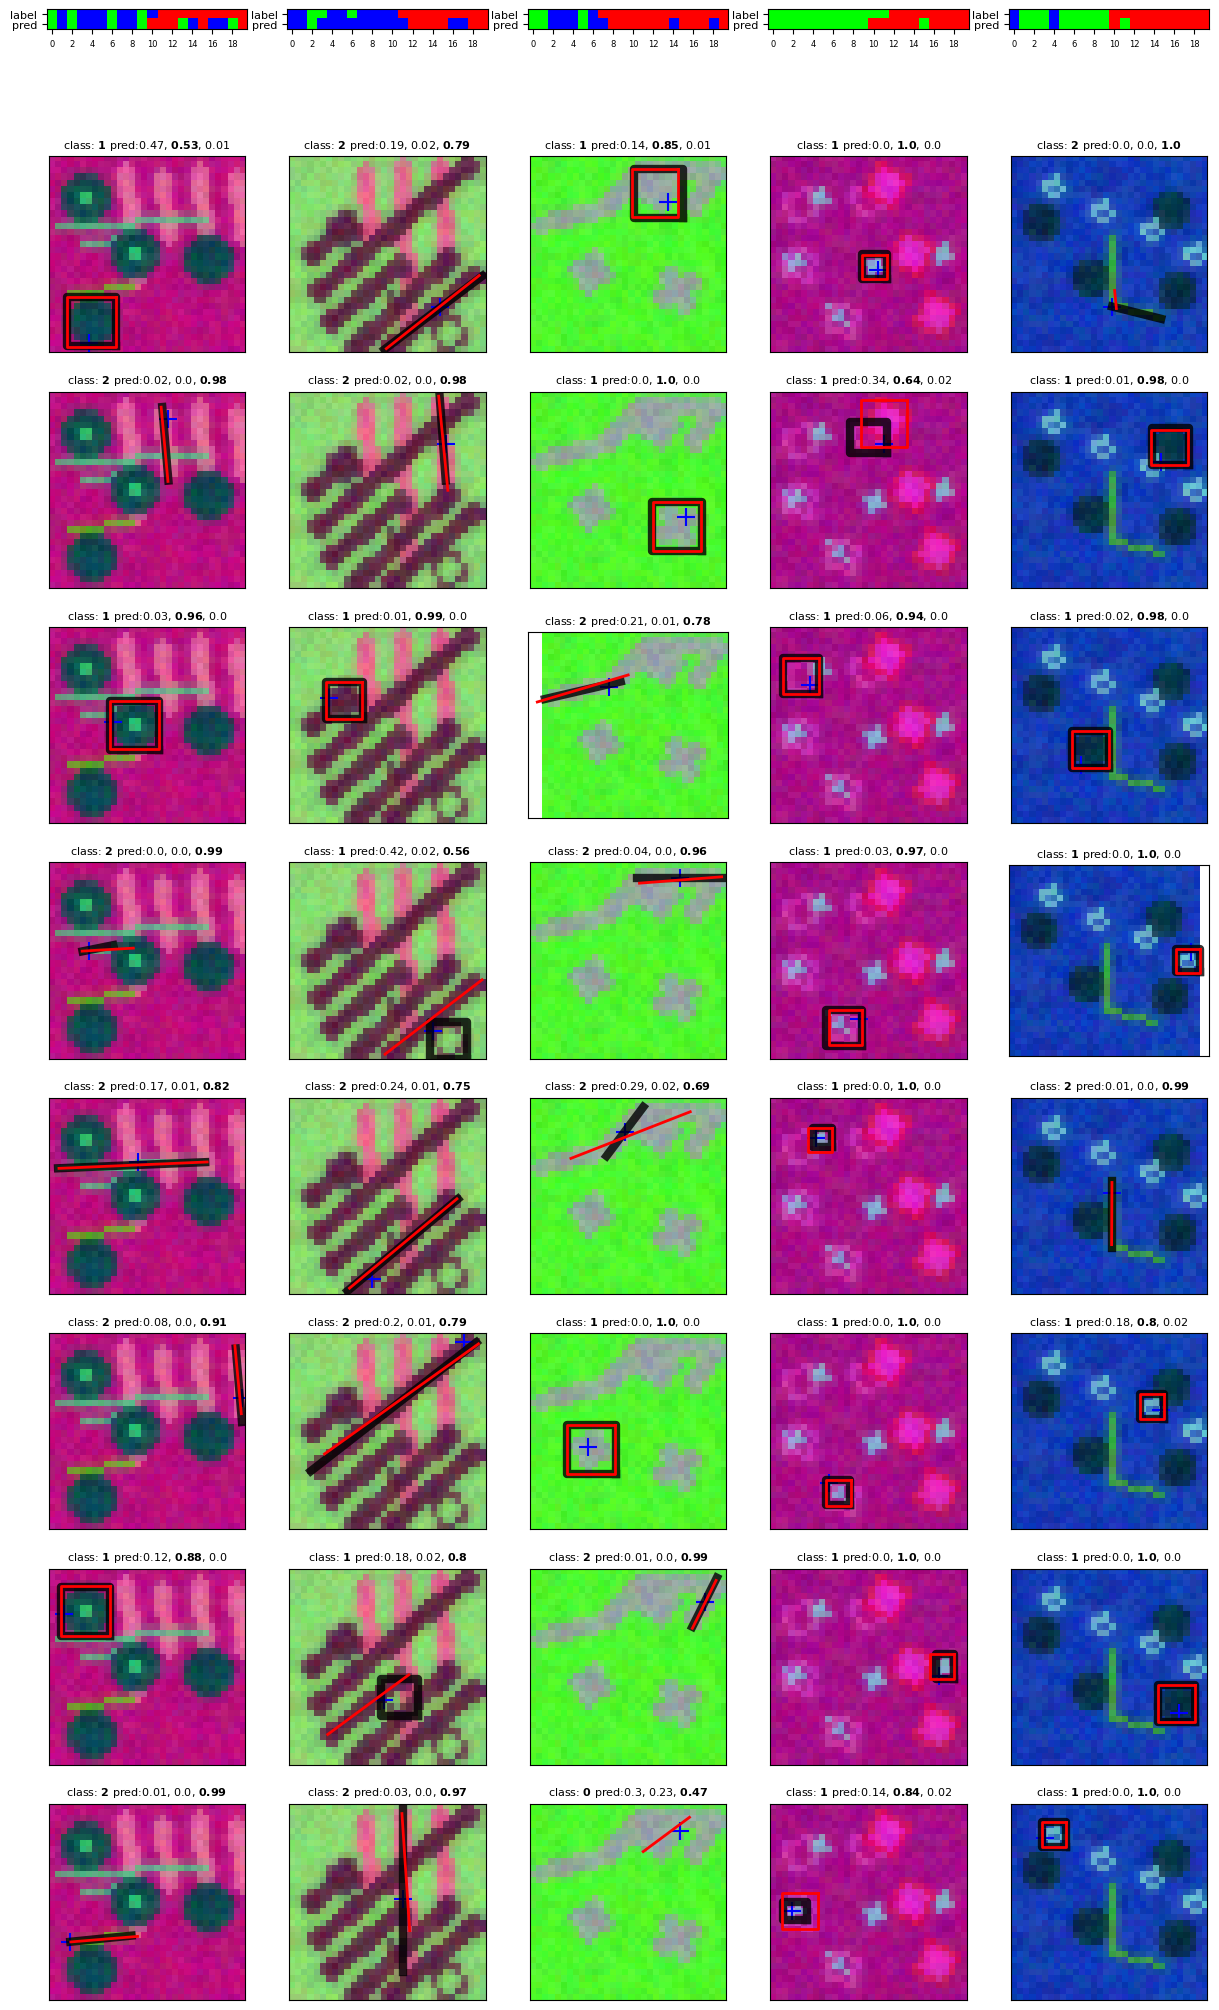

<Figure size 640x480 with 0 Axes>

In [7]:
# Plot results
%run -i ../exp_lib/plots/vec_detection.py --s=5 --r=8

In [8]:
tf.config.experimental.get_memory_info('GPU:0')['peak']*1e-6

805.6709119999999

# Mid Layers Analysis

## MHA scores map

In [43]:
inter_model = tf.keras.Model(trainer.model.input, (trainer.model.get_layer('vdMHA_2').output[1], trainer.model.output))

/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/models/functional.py:106: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'img' mapping to value <KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=None, name=keras_tensor_571> which has name 'keras_tensor_571'. Change the tensor name to 'img' (via `Input(..., name='img')`)
  warnings.warn(


img (8, 32, 32, 3) <dtype: 'float32'>
sample_points (8, 20, 2) <dtype: 'int32'>
class_split (8, 20) <dtype: 'float32'>
vec_labels (8, 20, 4, 2) <dtype: 'float32'>
components_class (8, 20) <dtype: 'float32'>
vecs_weights (8, 20) <dtype: 'float32'>
class_weights (8, 20) <dtype: 'float32'>
pred_vecs (8, 20, 4, 2) <dtype: 'float32'>
pred_class (8, 20) <dtype: 'float32'>
scores_map (8, 20, 32, 32) <dtype: 'float32'>


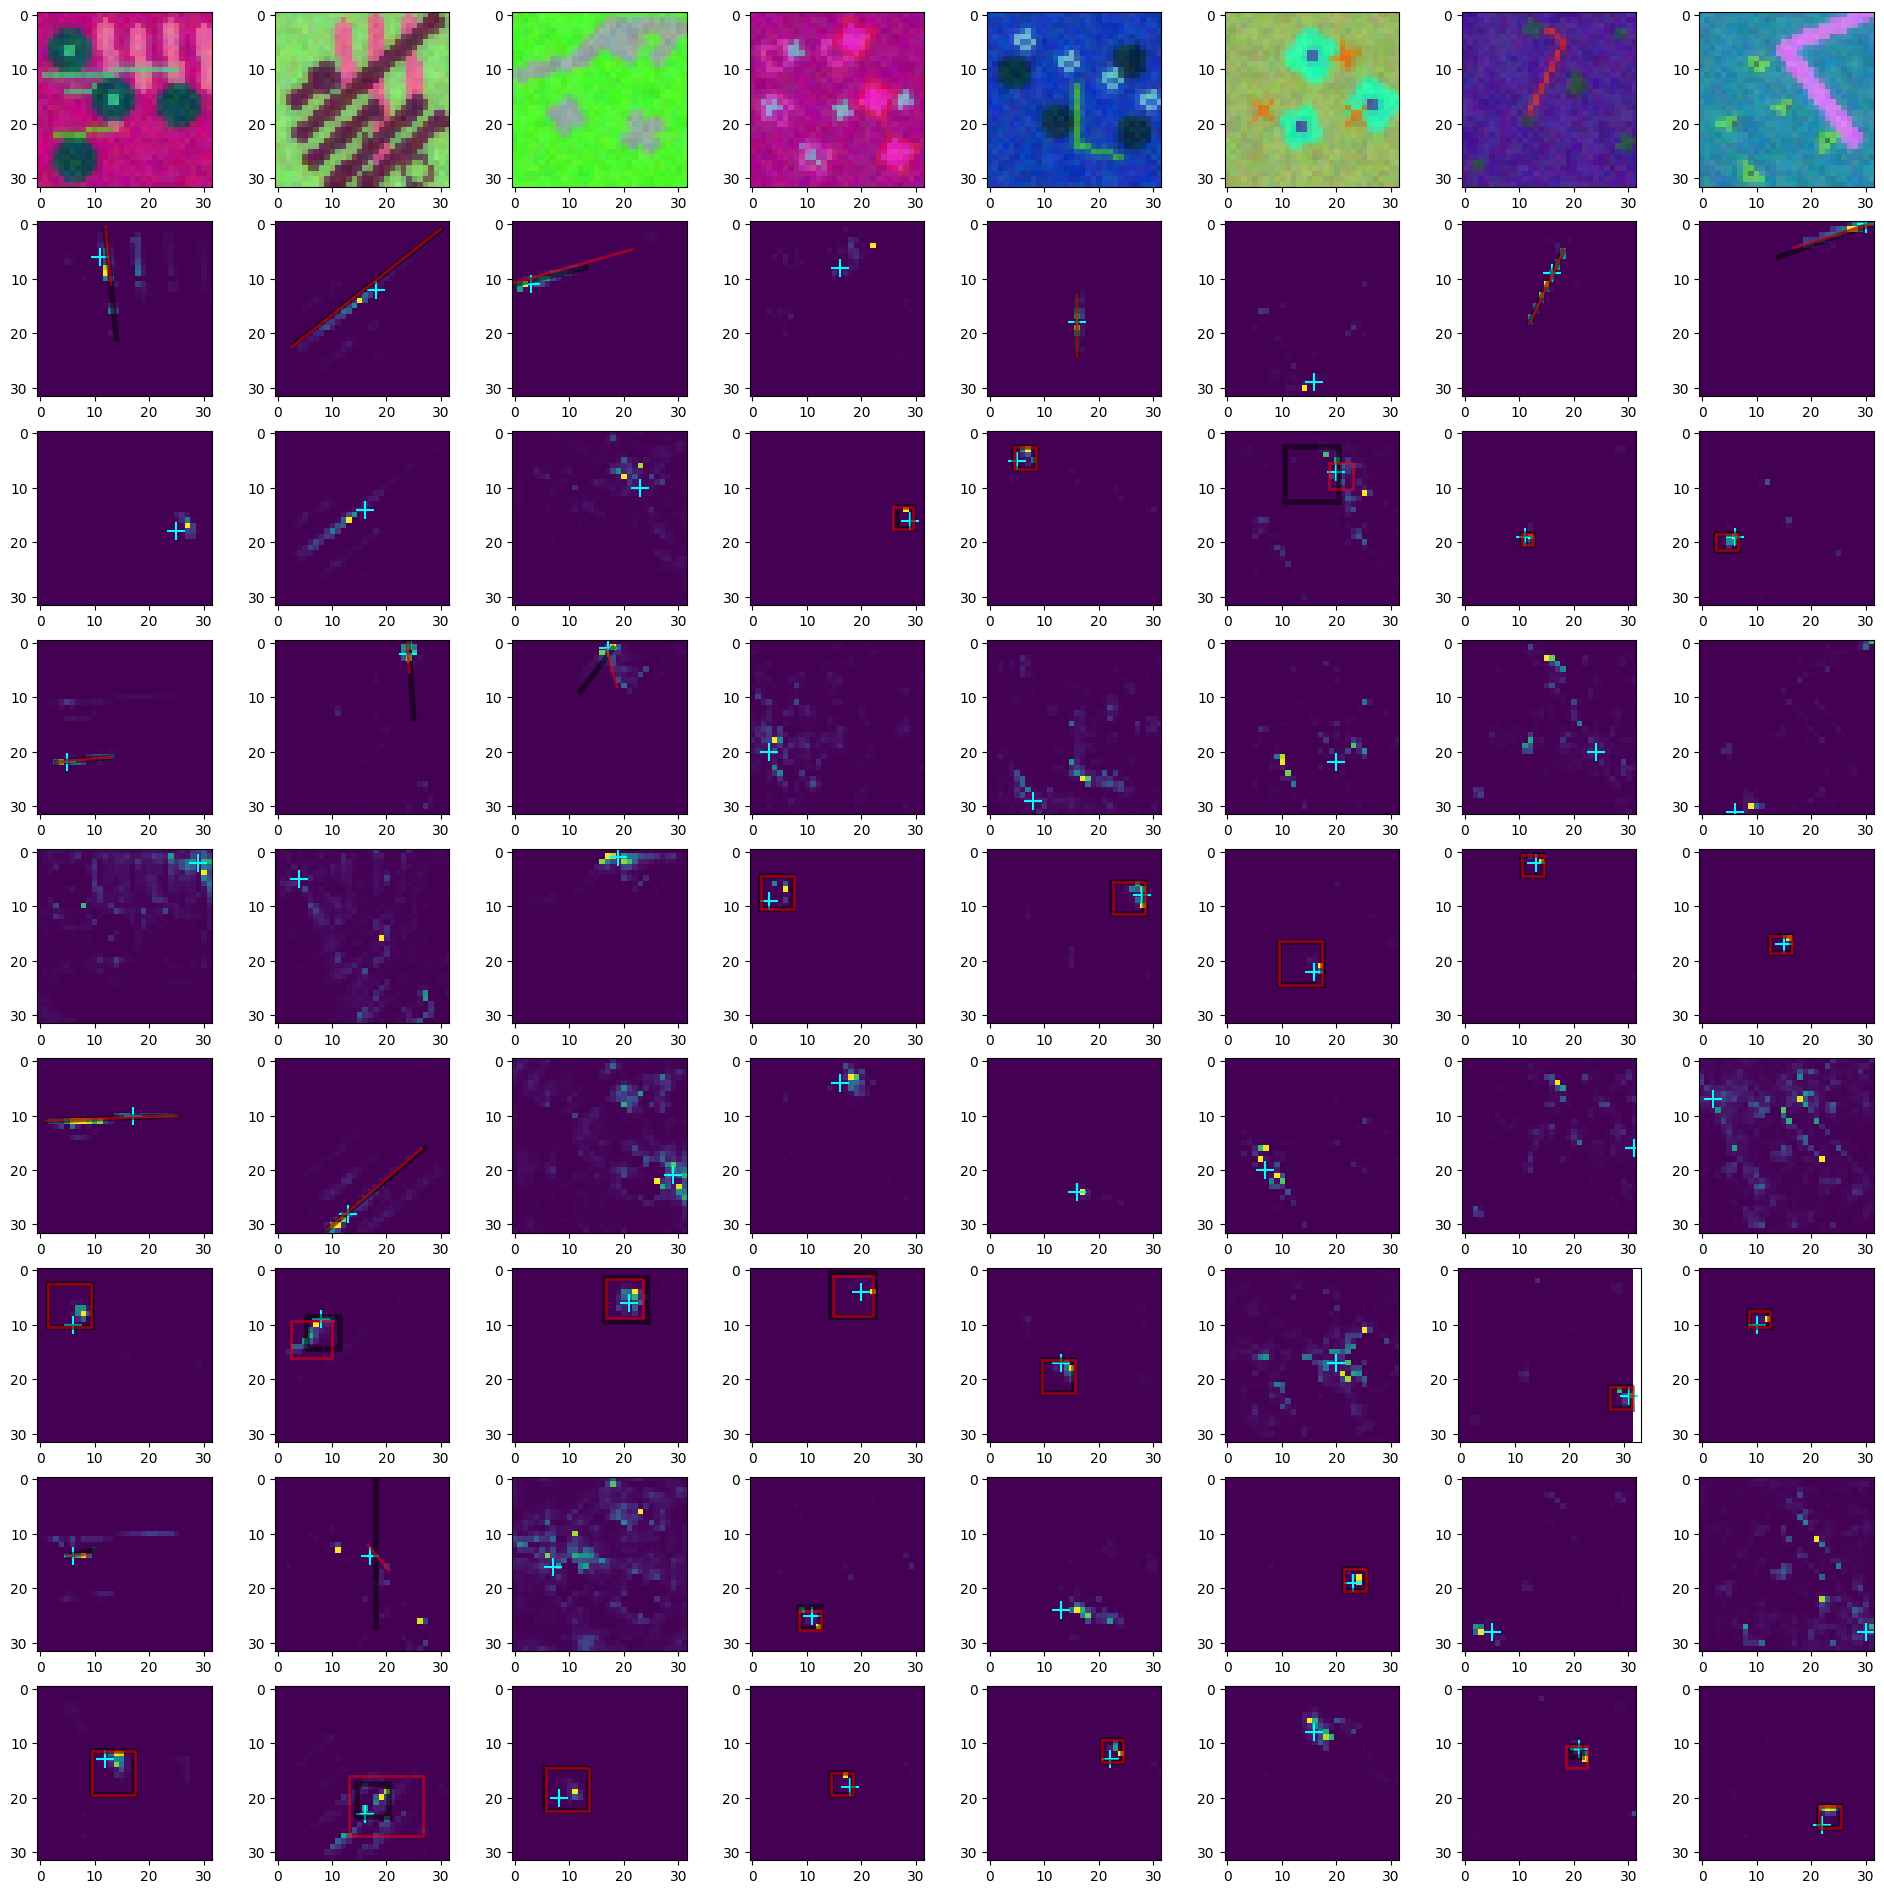

In [44]:
#features, labels, labels_weights = next(test_iter)
img, sample_points, class_split = features.values()
vecs_labels, components_class = labels.values()
vecs_weights, class_weights = [tf.where(o>0, 1.0, 0.0) for o in labels_weights.values()]


print('img', img.shape, img.dtype)
print('sample_points', sample_points.shape, sample_points.dtype)
print('class_split', class_split.shape, class_split.dtype)
print('vec_labels', vecs_labels.shape, vecs_labels.dtype)
print('components_class', components_class.shape, components_class.dtype)
print('vecs_weights', vecs_weights.shape, vecs_weights.dtype)
print('class_weights', class_weights.shape, class_weights.dtype)

vecs_labels =tf.reduce_sum(tf.reshape(vecs_labels, (-1,cfg.sample_points,2,2,2)), axis=-3)



scores_map, preds  = inter_model(features, training=False)
scores_map = tf.reshape(scores_map[:,:,0], (cfg.test_batch_size, cfg.sample_points, generator_cfg.size, generator_cfg.size))
pred_vecs, pred_class = preds.values()

print('pred_vecs', pred_vecs.shape, pred_vecs.dtype)
print('pred_class', pred_class.shape, pred_class.dtype)
print('scores_map', scores_map.shape, scores_map.dtype)
pred_vecs =tf.reduce_sum(tf.reshape(pred_vecs, (-1,cfg.sample_points,2,2,2)), axis=-3)

s=8
i=0

max_rows=8
rows = min(max_rows, cfg.sample_points)

fig, axs = plt.subplots(rows+1, s, figsize=(s*3, rows*3))

for i in range(s):
    i_vecs, i_bboxes = vcm.prepare_components_vecs_to_plot(vecs_labels[i], components_class[i])
    p_vecs, p_bboxes = vcm.prepare_components_vecs_to_plot(pred_vecs[i], components_class[i])

    i_components = [i_vecs[...,j] for j in range(i_vecs.shape[-1])] + [i_bboxes[...,j] for j in range(i_bboxes.shape[-1])]
    p_components = [p_vecs[...,j] for j in range(p_vecs.shape[-1])] + [p_bboxes[...,j] for j in range(p_bboxes.shape[-1])]

    i_sample_points = tf.concat([tf.gather(sample_points[i], tf.where(components_class[i]==1)[...,0], axis=0),
                                 tf.gather(sample_points[i], tf.where(components_class[i]==0)[...,0], axis=0)], axis=0)
    
    i_maps = tf.concat([tf.gather(scores_map[i], tf.where(components_class[i]==1)[...,0], axis=0),
                                 tf.gather(scores_map[i], tf.where(components_class[i]==0)[...,0], axis=0)], axis=0)
    
    i_weights = tf.concat([tf.gather(class_weights[i], tf.where(components_class[i]==1)[...,0], axis=0),
                                 tf.gather(class_weights[i], tf.where(components_class[i]==0)[...,0], axis=0)], axis=0)
    axs[0,i].imshow(img[i])
    for r in range(rows): #range(cfg.sample_points):
        ax = axs[r+1,i]
        r = r if r%2==0 else r//2+cfg.sample_points//2
        ax.imshow(i_maps[r])
        ax.scatter(*i_sample_points[r][::-1], marker='+', color='aqua', s=150)
        if i_weights[r]>0:
            ax.plot(*i_components[r], color='black', linewidth=4, alpha=0.5)
            ax.plot(*p_components[r], color='red', linewidth=2, alpha=0.5)

## Query-Samples

In [36]:
inter_model = tf.keras.Model(trainer.model.input, (trainer.model.get_layer('Query-Sample_2').output, trainer.model.output))

img (8, 32, 32, 3) <dtype: 'float32'>
sample_points (8, 20, 2) <dtype: 'int32'>
class_split (8, 20) <dtype: 'float32'>
vec_labels (8, 20, 4, 2) <dtype: 'float32'>
components_class (8, 20) <dtype: 'float32'>
vecs_weights (8, 20) <dtype: 'float32'>
class_weights (8, 20) <dtype: 'float32'>
pred_vecs (8, 20, 4, 2) <dtype: 'float32'>
pred_class (8, 20) <dtype: 'float32'>
queries_points (8, 20, 8, 2) <dtype: 'float32'>


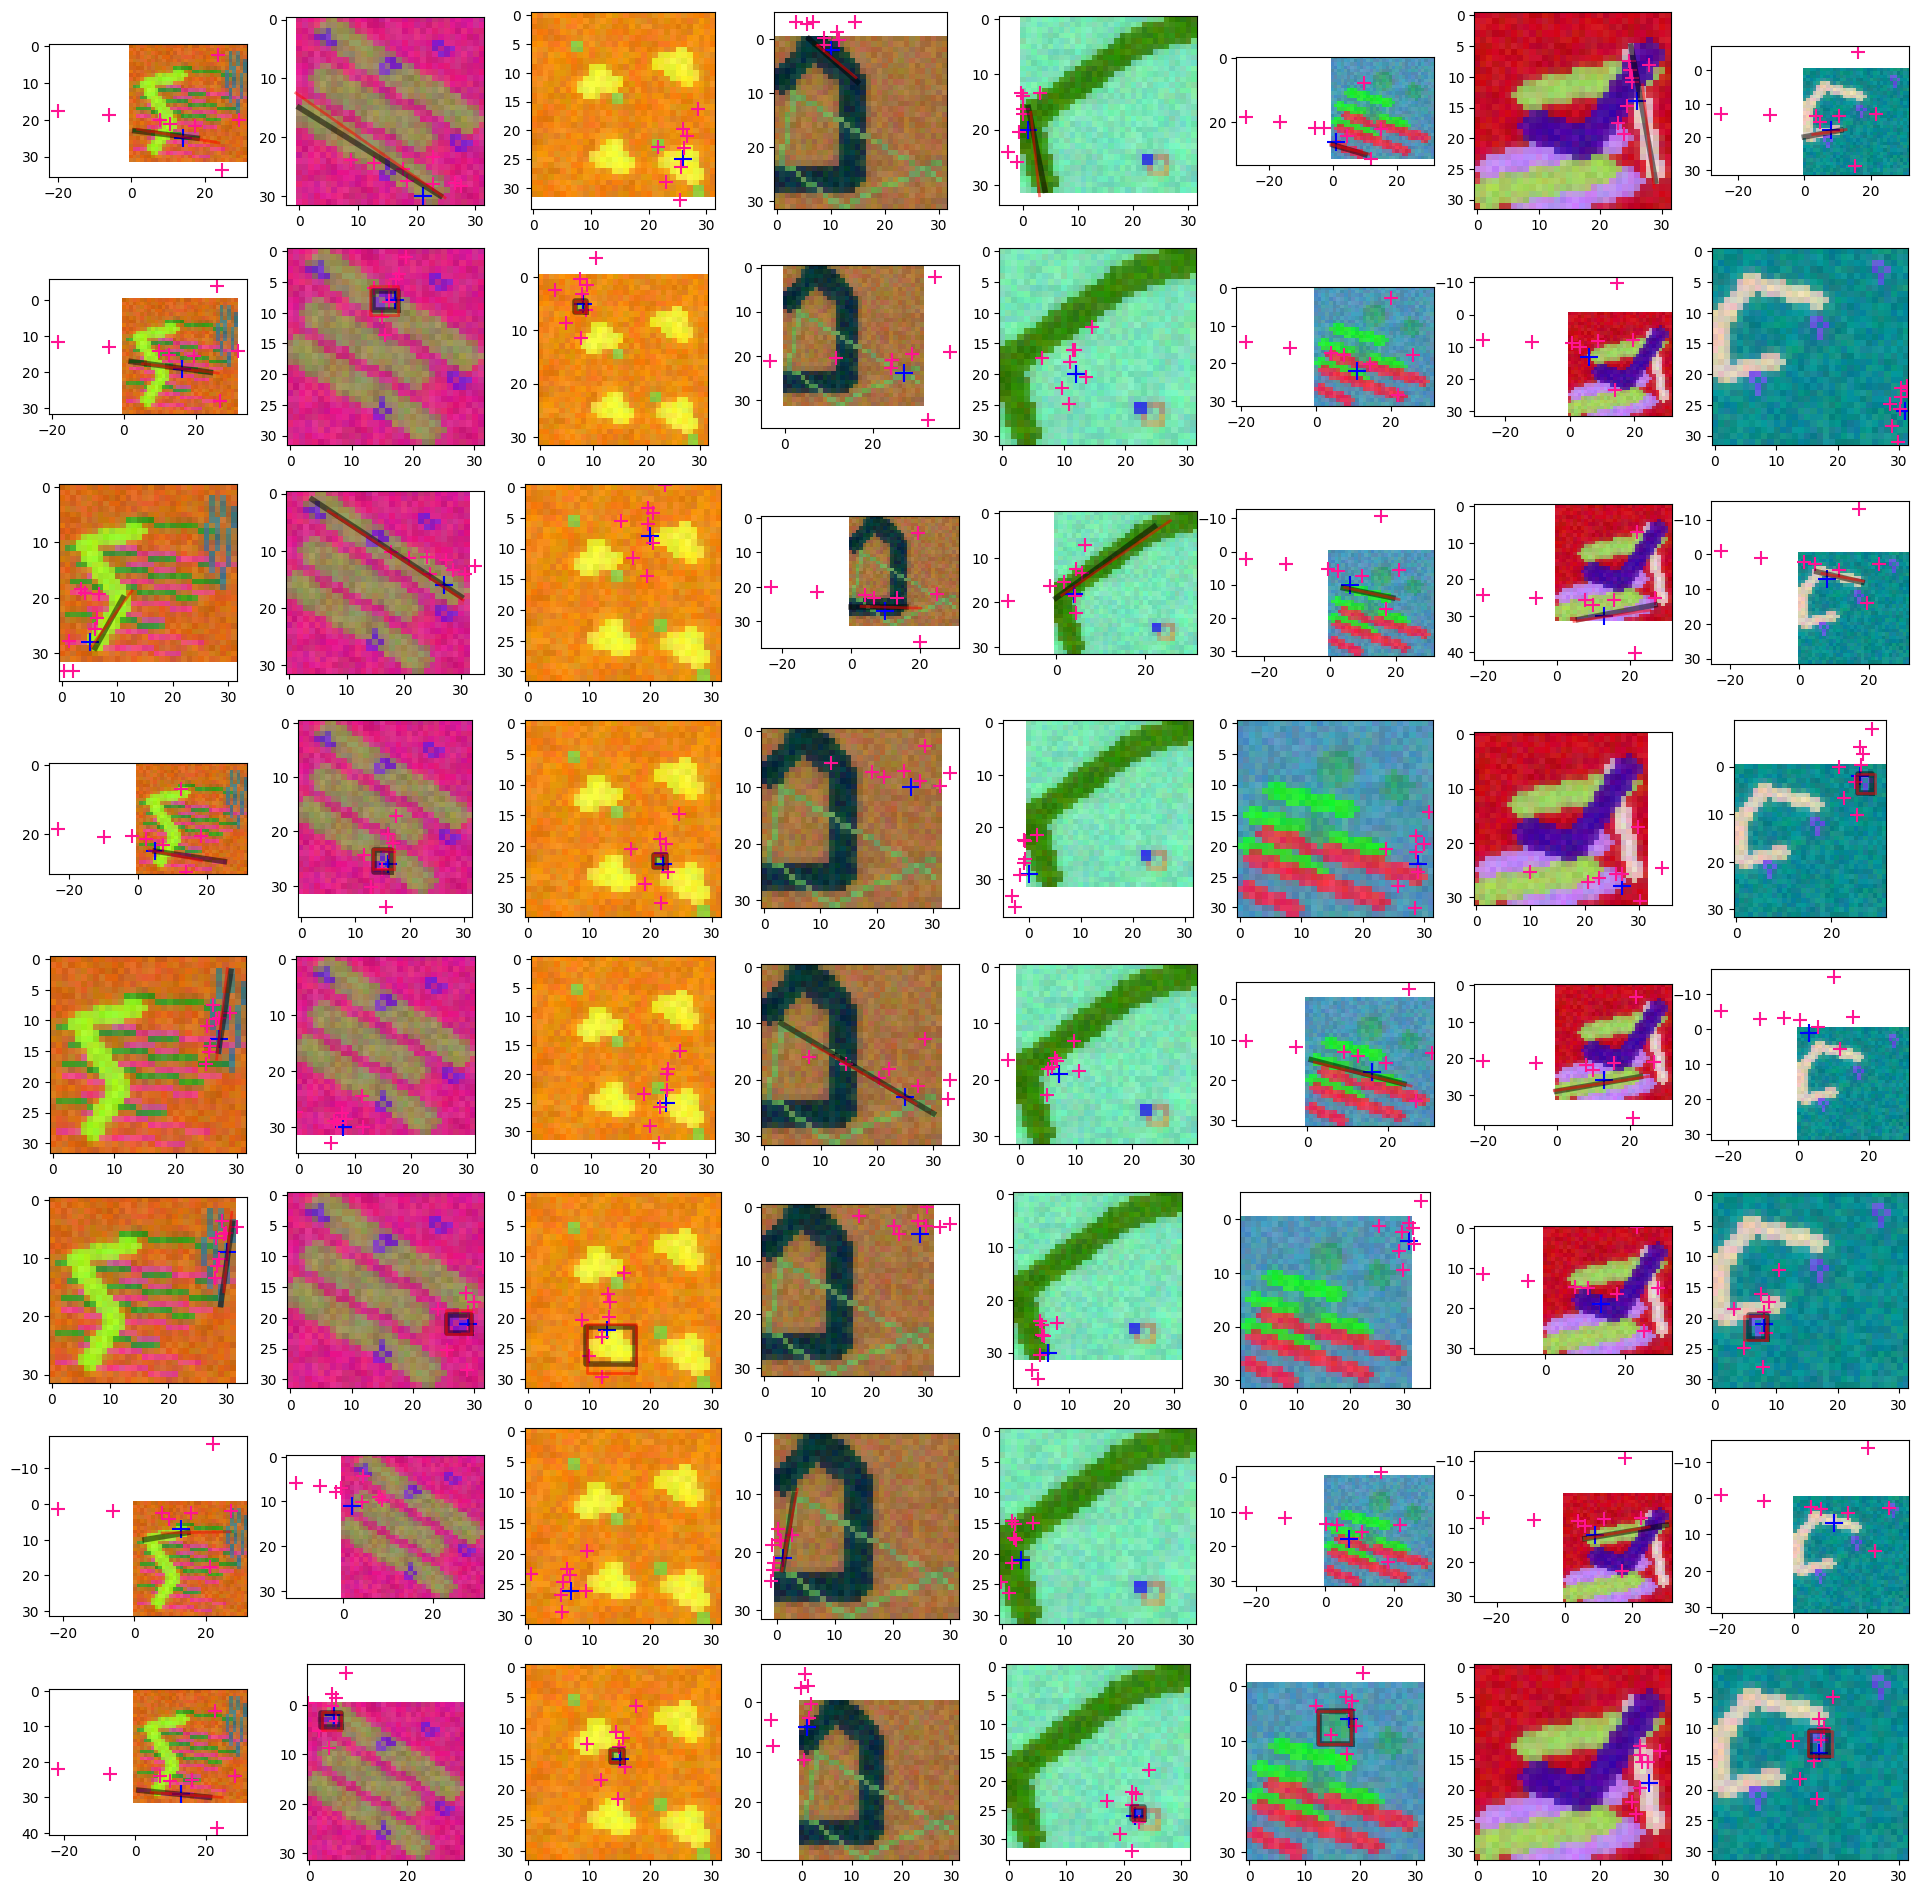

In [37]:
features, labels, labels_weights = next(test_iter)
img, sample_points, class_split = features.values()
vecs_labels, components_class = labels.values()
vecs_weights, class_weights = [tf.where(o>0, 1.0, 0.0) for o in labels_weights.values()]


print('img', img.shape, img.dtype)
print('sample_points', sample_points.shape, sample_points.dtype)
print('class_split', class_split.shape, class_split.dtype)
print('vec_labels', vecs_labels.shape, vecs_labels.dtype)
print('components_class', components_class.shape, components_class.dtype)
print('vecs_weights', vecs_weights.shape, vecs_weights.dtype)
print('class_weights', class_weights.shape, class_weights.dtype)

vecs_labels =tf.reduce_sum(tf.reshape(vecs_labels, (-1,cfg.sample_points,2,2,2)), axis=-3)



queries_points, preds  = inter_model(features, training=False)
pred_vecs, pred_class = preds.values()

print('pred_vecs', pred_vecs.shape, pred_vecs.dtype)
print('pred_class', pred_class.shape, pred_class.dtype)
print('queries_points', queries_points.shape, queries_points.dtype)
pred_vecs =tf.reduce_sum(tf.reshape(pred_vecs, (-1,cfg.sample_points,2,2,2)), axis=-3)

s=8
i=0

max_rows=8
rows = min(max_rows, cfg.sample_points)

fig, axs = plt.subplots(rows, s, figsize=(s*3, rows*3))

for i in range(s):
    i_vecs, i_bboxes = vcm.prepare_components_vecs_to_plot(vecs_labels[i], components_class[i])
    p_vecs, p_bboxes = vcm.prepare_components_vecs_to_plot(pred_vecs[i], components_class[i])

    i_components = [i_vecs[...,j] for j in range(i_vecs.shape[-1])] + [i_bboxes[...,j] for j in range(i_bboxes.shape[-1])]
    p_components = [p_vecs[...,j] for j in range(p_vecs.shape[-1])] + [p_bboxes[...,j] for j in range(p_bboxes.shape[-1])]

    i_sample_points = tf.concat([tf.gather(sample_points[i], tf.where(components_class[i]==1)[...,0], axis=0),
                                 tf.gather(sample_points[i], tf.where(components_class[i]==0)[...,0], axis=0)], axis=0)
    
    i_queries_points = tf.concat([tf.gather(queries_points[i], tf.where(components_class[i]==1)[...,0], axis=0),
                                 tf.gather(queries_points[i], tf.where(components_class[i]==0)[...,0], axis=0)], axis=0)
    
    i_weights = tf.concat([tf.gather(class_weights[i], tf.where(components_class[i]==1)[...,0], axis=0),
                                 tf.gather(class_weights[i], tf.where(components_class[i]==0)[...,0], axis=0)], axis=0)
    for r in range(rows): #range(cfg.sample_points):
        ax = axs[r,i]
        r = r if r%2==0 else r//2+cfg.sample_points//2
        ax.imshow(img[i])
        ax.scatter(*i_sample_points[r][::-1], marker='+', color='blue', s=150)
        ax.scatter(*tf.transpose(i_queries_points[r], [1,0])[::-1], marker='+', color='deeppink', s=100)
        if i_weights[r]>0:
            ax.plot(*i_components[r], color='black', linewidth=4, alpha=0.5)
            ax.plot(*p_components[r], color='red', linewidth=2, alpha=0.5)

# experiments

In [13]:
features = tf.ones((8,1,1024,64))
sample_features = tf.ones((8,20,1,64))
sample_points = tf.ones((8,20,2))
pos_enc = tf.ones((8,20,1024,64))

query_points = tf.ones((8,20,6,2))
unsqueezed_features = tf.ones((8,32,32,64))

shape = tf.shape(query_points)
B, sample_points_num, query_points_num = [shape[i] for i in range(3)]
query_boxes = tf.concat([query_points-0.5, query_points+0.5], axis=-1)
print(query_boxes.shape)
box_indices = tf.reshape(tf.repeat(tf.range(B, dtype=tf.int32)[:,tf.newaxis], sample_points_num*query_points_num, axis=-1), (-1,))
print(box_indices.shape)
query_boxes = tf.reshape(query_boxes, (-1,4))
print(query_boxes.shape)

query_samples = tf.image.crop_and_resize(unsqueezed_features, query_boxes, box_indices, crop_size=[1,1])
print(query_samples.shape)
query_samples = tf.reshape(query_samples, (B, sample_points_num, query_points_num, -1))
print(query_samples.shape)

(8, 20, 6, 4)
(960,)
(960, 4)
(960, 1, 1, 64)
(8, 20, 6, 64)


In [ ]:
query_points = vcm.QuerySamplingLayer(queries_num=6, mid_layers=1, mid_units=64, activation='relu', dropout=0.0)([sample_features, sample_points])
print(query_points.shape)

query_samples = vcm.SampleQueryExtractionLayer(crop_size=[1,1])([features, query_points])
print(query_samples.shape)

a = vcm.SampleQueryMessagePassing(num_heads=1, size=32, mid_layers=1, mid_units=64, activation='relu', dropout=0.0, enc_type='frequency')(sample_features, query_samples, sample_points, query_points)
print(a.shape)

(8, 20, 6, 2)
(8, 20, 6, 64)
(8, 20, 1, 64)


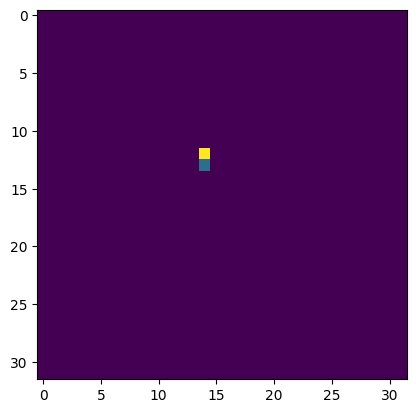

In [ ]:
yx = xy_coords((32,32))[...,::-1]
p = tf.constant([12.4, 14.1], tf.float32)

diffs = tf.reduce_sum(tf.abs(p-yx), axis=-1, keepdims=True)
bilinear_map = tf.nn.relu(1-diffs+1e-4)**2
bilinear_map /= tf.reduce_sum(bilinear_map)+1e-4
plt.imshow(bilinear_map)